In [1]:
#importing necessary libraries
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D, Bidirectional,Conv1D , MaxPooling1D, Flatten
from tensorflow.keras.layers import Embedding

#importing IMDB dataset
df = pd.read_csv("./IMDB Dataset.csv")

In [2]:
#confirming data has been imported successfully
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#changing sentiment into integer values (positive -> 1; negative -> 0)
all_labels = df.sentiment.factorize()
all_reviews=df.review.values

In [4]:
#partition dataset into training and testing (80-20 split)
train_labels=all_labels[0][:40000] 
test_labels=all_labels[0][40000:]
train_reviews = all_reviews[:40000]
test_reviews=all_reviews[40000:]

In [5]:
#confirming split has occurred as intended
print(len(test_labels))
print(len(test_reviews))

10000
10000


In [6]:
#using tokenizer class to pre-process data (as well as padding as needed)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_reviews)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(train_reviews)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [7]:
#check if encoding has occurred properly
print(train_reviews[0])
print(encoded_docs[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [8]:
#another check
print(padded_sequence[0])

[   8    1  360  353    4    1  673    7    7    9    6  431 2968   14
   12    6    1  356    5    1 2594 1087    9 2661 1432   20  534   32
 4795 2451    4    1 1193  117   29    1   25 2874    2  392   34    6
   21  304   20    1 4796  534    6  346    5  106 4721 2306    2   50
   34  326    2   23  111  226  241    7    7   10   58  132    1  282
 1318    4    1  118    6  687    5    1  192   12    9  272  117   80
  276  597 3067  838  179 1352 4332   15 2496 1221  838 1433  838  885
 2968  152  975  183    1   87  409   10  123  210 3256   68   14   34
 1613    9   13 2290   10  421  132   10   13 1609   15    9   18   14
   10  287   50   10 1448    3 1309   15 2968    2  191    5    1  304
 2078    4 2202  569   21   39  569   18   26 2857   42   15    3  512
   20  637    2   75  241   16    9   69  664  705  109  659   83 1193
  687    5   65  571    4  907 2117   38 1193  553  147 2968   22  204
  432 3713   16   48    6 3407  806 1640   43   22   66   75    8 1201
   16 

In [14]:
#Recurrent neural network model construction
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.55, recurrent_dropout=0.55))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           3589568   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,642,869
Trainable params: 3,642,869
Non-trainable params: 0
____________________________________________

In [15]:
#train the model for set number of epochs
history = model.fit(padded_sequence,train_labels,validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
1000/1000 [==============================] - 198s 197ms/step - loss: 0.4616 - accuracy: 0.7741 - val_loss: 0.3399 - val_accuracy: 0.8561
Epoch 2/5
1000/1000 [==============================] - 197s 197ms/step - loss: 0.3152 - accuracy: 0.8719 - val_loss: 0.3323 - val_accuracy: 0.8716
Epoch 3/5
1000/1000 [==============================] - 198s 198ms/step - loss: 0.2851 - accuracy: 0.8853 - val_loss: 0.3494 - val_accuracy: 0.8755
Epoch 4/5
1000/1000 [==============================] - 198s 198ms/step - loss: 0.2639 - accuracy: 0.8960 - val_loss: 0.3052 - val_accuracy: 0.8788
Epoch 5/5
1000/1000 [==============================] - 199s 199ms/step - loss: 0.2449 - accuracy: 0.9040 - val_loss: 0.3443 - val_accuracy: 0.8605


In [16]:
#import for charts below
import matplotlib.pyplot as plt

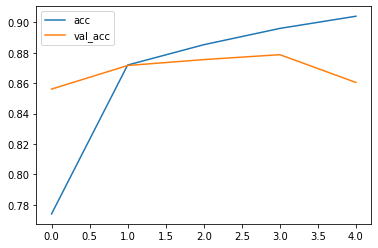

<Figure size 432x288 with 0 Axes>

In [17]:
#plot accuracy
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

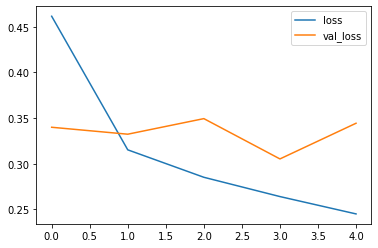

<Figure size 432x288 with 0 Axes>

In [18]:
#plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [14]:
#method predicting sentiment of a piece of text
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", all_labels[1][prediction])

In [15]:
#method computing accuracy of the entire model
def getAccuracy(model):    
    correct=0
    for i in range(len(test_reviews)):
        tw = tokenizer.texts_to_sequences([test_reviews[i]])
        tw = pad_sequences(tw,maxlen=200)
        prediction = int(model.predict(tw).round().item())
        if prediction == test_labels[i]:
            correct+=1
    return (correct/len(test_reviews))*100        

In [17]:
#check predict_sentiment working as intended
test_sentence1 = "I liked my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is a bad flight!"
predict_sentiment(test_sentence2)

Predicted label:  positive
Predicted label:  negative


In [18]:
#obtain accuracy of the model
print(getAccuracy(model))

87.76
